In [204]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier

1- Imprimir las dimensiones del conjunto de datos de "breast cancer", tanto a nivel de atributos como a nivel de clases: 

In [205]:
cancer= load_breast_cancer()
print (cancer)


{'data': array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 

Como se observa a continuación, este conjunto de datos está compuesto por 30 atributos, 569 instancias y dos clases.

In [206]:
(len(cancer.data),len(cancer.feature_names),len(cancer.target_names))

(569, 30, 2)

2- Seleccione 5 algoritmos de clasificación.
Los algoritmos de clasificación seleccionados son los siguientes:
A) AdaBoostClassifier 
B) Linear SVM
C) Naive Bayes
D) Random forest 
E) BernoulliNBClassifier

Seguidamente se cargaron las librerías de los algoritmos clasificadores que se utilizaron: 

In [207]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

2-Separación del conjunto de datos en set de prueba y set de entrenamiento:

In [208]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3)

3- Determinación del mejor algoritmo de clasificación y afinamiento de parámetros

# 1- AdaBoost

In [209]:
adaboostclassifier = AdaBoostClassifier().fit(X_train, y_train)
print("Training set score: {:.3f}".format(adaboostclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(adaboostclassifier.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.971


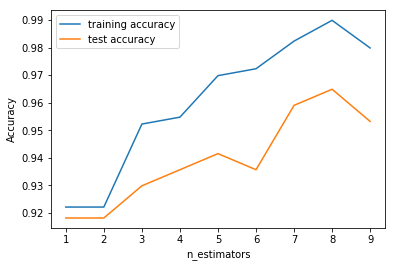

In [210]:
from sklearn.ensemble import AdaBoostClassifier
training_acc = []
test_acc = []
rango = range(1, 10)
for n in rango:
    adaboost = AdaBoostClassifier(n_estimators=n).fit(X_train, y_train)
    training_acc.append(adaboost.score(X_train, y_train))
    test_acc.append(adaboost.score(X_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

El valor optimo de n estimators es igual a 2

# 2- Linear SVM

In [211]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
print("Training set score: {:.3f}".format(svc.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svc.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.673


In [212]:
training_accuracy = []
test_accuracy = []
c_range_svm = []
for i in range(1,30):
    c_range_svm.append(i*0.001)
for c in c_range_svm:
    svm_clf = SVC(kernel="linear", C=c)
    svm_clf.fit(X_train, y_train)
    training_accuracy.append(svm_clf.score(X_train, y_train))
    test_accuracy.append(svm_clf.score(X_test, y_test))

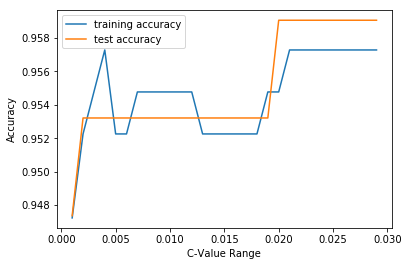

In [213]:
plt.plot(c_range_svm, training_accuracy, label="training accuracy")
plt.plot(c_range_svm, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C-Value Range")
plt.legend()

Optimización de parámetros:

In [214]:
svm_clf = SVC(kernel="linear", C=0.0175)
svm_clf.fit(X_train, y_train)
svm_score_training = svm_clf.score(X_train, y_train)
svm_score_test = svm_clf.score(X_test, y_test)

(svm_score_training, svm_score_test)

(0.95226130653266328, 0.95321637426900585)

# 3- Naive Bayes

In [215]:
GaussianNB = GaussianNB().fit(X_train, y_train)
print("Training set score: {:.3f}".format(GaussianNB.score(X_train, y_train)))
print("Test set score: {:.3f}".format(GaussianNB.score(X_test, y_test)))

Training set score: 0.945
Test set score: 0.930


Este clasificador presenta training set score y test set score altos y muy similares, debido a lo cual no requiere de un afinamiento de parámetros

# 4- Random forest

In [216]:
from sklearn.ensemble import RandomForestClassifier
training_accuracy_rf = []
test_accuracy_rf = []
n_range = range(1,15)
for n in n_range:
    rf_clf = RandomForestClassifier(max_depth=5, n_estimators=n, max_features=2)
    rf_clf.fit(X_train, y_train)
    training_accuracy_rf.append(rf_clf.score(X_train, y_train))
    test_accuracy_rf.append(rf_clf.score(X_test, y_test))

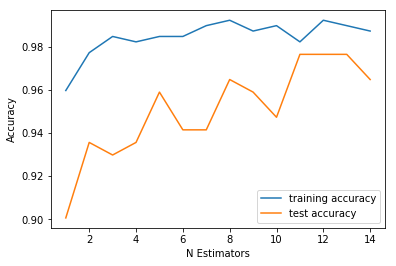

In [217]:
plt.plot(n_range, training_accuracy_rf, label="training accuracy")
plt.plot(n_range, test_accuracy_rf, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("N Estimators")
plt.legend()

Correción de overfitting

In [218]:
rf_clf = RandomForestClassifier(n_estimators=2)
rf_clf.fit(X_train, y_train)
training_set_score = rf_clf.score(X_train, y_train)
test_set_score = rf_clf.score(X_test, y_test)

(training_set_score, test_set_score)

(0.95979899497487442, 0.92397660818713445)

# 5- BernoulliNB

In [219]:
from sklearn.naive_bayes import BernoulliNB
rf_clf=BernoulliNB(alpha=1.0, binarize=0.0)
rf_clf.fit(X_train, y_train)
training_set_score = rf_clf.score(X_train, y_train)
test_set_score = rf_clf.score(X_test, y_test)

(training_set_score, test_set_score)

(0.60804020100502509, 0.67251461988304095)

Optimización de parámetros

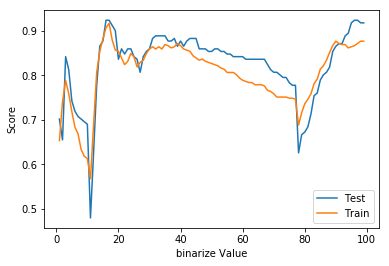

In [220]:
lista_resultados=[]
lista_resultados2=[]
numeros = range(1,100)
for i in numeros:
    rf_clf=BernoulliNB(alpha=1.0, binarize=i)
    rf_clf.fit(X_train, y_train)
    score_temp=rf_clf.score(X_test, y_test)
    score_temp2=rf_clf.score(X_train, y_train)
    lista_resultados.append(score_temp)
    lista_resultados2.append(score_temp2)
    

plt.plot(numeros,lista_resultados, label="Test")
plt.plot(numeros,lista_resultados2, label="Train")
plt.xlabel("binarize Value")
plt.ylabel("Score")
plt.legend(loc=4)
plt.show()

5- Validación cruzada

Validación cruzada de algoritmo AdaBoostClassifier usando Shufflesplit

In [221]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf =AdaBoostClassifier(n_estimators=n).fit(X_train, y_train)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.93333333  0.96842105  0.93684211  0.96140351  0.94736842]


Validación cruzada de algoritmo LinearSVM usando Shufflesplit

In [222]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf =SVC(kernel="linear", C=c)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.93333333  0.94736842  0.96140351  0.94736842  0.93684211]


Validación cruzada de algoritmo Naive Bayes usando Shufflesplit

In [223]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf = GradientBoostingClassifier(max_depth=1)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

NameError: name 'GradientBoostingClassifier' is not defined

Validación cruzada de algoritmo Random forest usando Shufflesplit

In [224]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf=RandomForestClassifier(n_estimators=1, max_depth=1, random_state=0, min_samples_split=0.6)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.89473684  0.84210526  0.88070175  0.86666667  0.87017544]


Validación cruzada de algoritmo BernoulliNB usando Shufflesplit

In [225]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=5)
clf=BernoulliNB(alpha=1.0, binarize=95)
scores = cross_val_score(clf, cancer.data, cancer.target, cv=shuffle_split)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.85964912  0.86315789  0.89824561  0.87719298  0.87719298]


6-Conclusiones

En el conjunto de datos de cancér de mama, es posible realizar una clasificación correcta de las instancias en las  categorías maligno y benigno con todos lo slagoritmos que se probaron. No obstante, algunos algoritmos presentaron resultados mas precisos que otros. 
Para este caso el algoritmo con el que se obtuvieron mejores resultados (mayor porcentaje de instancias correctamente clasificadas, sin presencia de overfitting ni underfitting) fue Linear support vector machine.